# CartPole-v0: Initial Grid Search

_By [Michael Rosenberg](mailto:rosenberg.michael.m@gmail.com)._

_**Description**: Contains my analysis of the grid search I have performed on some CartPole-v0 simulations._

_Last Updated: 8/27/2017 5:05 AM._

In [27]:
#imports
import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt
import seaborn as sns

#helpers
sigLev = 3
numBins = 30
percentLev = 100
alphaLev = .3
pd.set_option("display.precision",sigLev)
maxRows = 999
pd.set_option("display.max_rows",maxRows)
%matplotlib inline
sns.set_style("darkgrid")

In [2]:
#load in data
modelDict = pkl.load(open("../data/raw/modelDict.pkl","rb"))
rewardDict = pkl.load(open("../data/raw/rewardDict.pkl","rb"))

# Initial Model Setup

I chose a model that was rather simple in design. I made it linear in $\mathbf{s}$, the state vector, and $a$, our action. In particular, I specified

$$\mathbf{x}(\mathbf{s},a) = (s_1a,s_1(1-a),s_2a,s_2(1-a),s_3a,s_3(1-a),s_4a,s_4(1-a)).$$

(Note: I could use a cleaner specification of this; tell me if there is one. If ordering doesn't matter, then perhaps as an abuse of notation, $(\mathbf{s}a,\mathbf{s}(1-a))$ could work.)

# Results

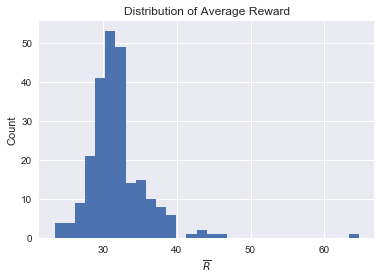

In [12]:
rewardFrame = pd.DataFrame(rewardDict)
avgRewardVec = rewardFrame.mean(axis = 0)
#then plot
plt.hist(avgRewardVec,bins = numBins)
plt.xlabel("$\overline{R}$")
plt.ylabel("Count")
plt.title("Distribution of Average Reward")

_Figure 1: Distribution of Average Reward per run, $\overline{R}$._

We see that on average, we are not doing incredibly well. However, we have some runs that are sitting at relatively high average reward.

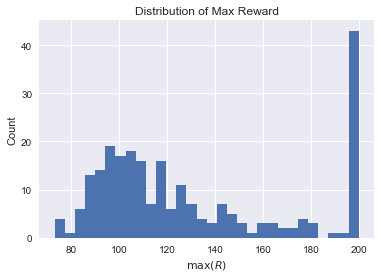

In [14]:
maxRewardVec = rewardFrame.max(axis = 0)
#then plot
plt.hist(maxRewardVec,bins = numBins)
plt.xlabel("$\max(R)$")
plt.ylabel("Count")
plt.title("Distribution of Max Reward")

_Figure 2: Distribution of Max Reward per run, $\max(R).$_

We do see that a meaningful number of our runs hit the $200$ reward benchmark for an episode. Since these runs are important for "solving" `Cartpole-v0`, we will now only consider runs with high average reward and the highest maximum reward.

In [21]:
highestReward = 200
maxRewardIndices = set(maxRewardVec[maxRewardVec == highestReward].index)
meanCutoff = 40
highMeanRewardIndices = set(avgRewardVec[avgRewardVec > meanCutoff].index)
consideredIndices = maxRewardIndices & highMeanRewardIndices

In [25]:
#study these models
consideredRewardFrame = rewardFrame.loc[:,consideredIndices]
for model in consideredIndices:
        print model, modelDict[model]

230 {'epsilon': 0.01, 'gamma': 0.9, 'alpha': 0.9}
102 {'epsilon': 0.1, 'gamma': 0.9, 'alpha': 0.5}
135 {'epsilon': 0.1, 'gamma': 1, 'alpha': 0.9}
239 {'epsilon': 0.01, 'gamma': 1, 'alpha': 1}
221 {'epsilon': 0.01, 'gamma': 0.8, 'alpha': 0.8}
166 {'epsilon': 0.05, 'gamma': 0.9, 'alpha': 0.7}


_Table 1: Our Model Parameters that led us to our best runs._

We see that low $\epsilon$ and high $\gamma$ perform very well in this context. This suggest that our best runs might occur when we have more greedy policies paired with low discounting of future rewards.

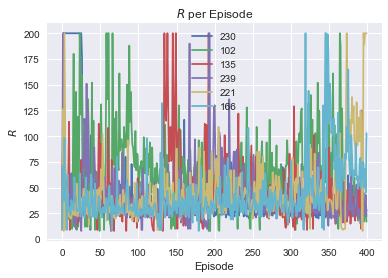

In [35]:
for consideredIndex in consideredIndices:
    plt.plot(rewardFrame.index,rewardFrame[consideredIndex],
             label = consideredIndex)
plt.legend()
plt.xlabel("Episode")
plt.ylabel("$R$")
plt.title("$R$ per Episode")

_Figure 3: Our top models by there $R$ on episodes._

We see that the behavior of these models is erratic, with most of them entering high performance thresholds and then rapidly climbing back down. Thus, I think we need to more focus on model specification at the moment over grid search.